In [18]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

#Data prep

In [ ]:
!kaggle datasets download -d jehanbhathena/weather-dataset

Dataset URL: https://www.kaggle.com/datasets/jehanbhathena/weather-dataset
License(s): CC0-1.0
 98% 573M/587M [00:03<00:00, 158MB/s]
100% 587M/587M [00:03<00:00, 170MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/weather-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
path = '/content/dataset'
path_imgs = list(glob.glob(path+'/**/*.jpg'))

In [ ]:
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], path_imgs))
file_path = pd.Series(path_imgs, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
data = pd.concat([file_path, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,File_Path,Labels
0,/content/dataset/hail/0204.jpg,hail
1,/content/dataset/hail/0242.jpg,hail
2,/content/dataset/rain/1597.jpg,rain
3,/content/dataset/sandstorm/3031.jpg,sandstorm
4,/content/dataset/fogsmog/4443.jpg,fogsmog


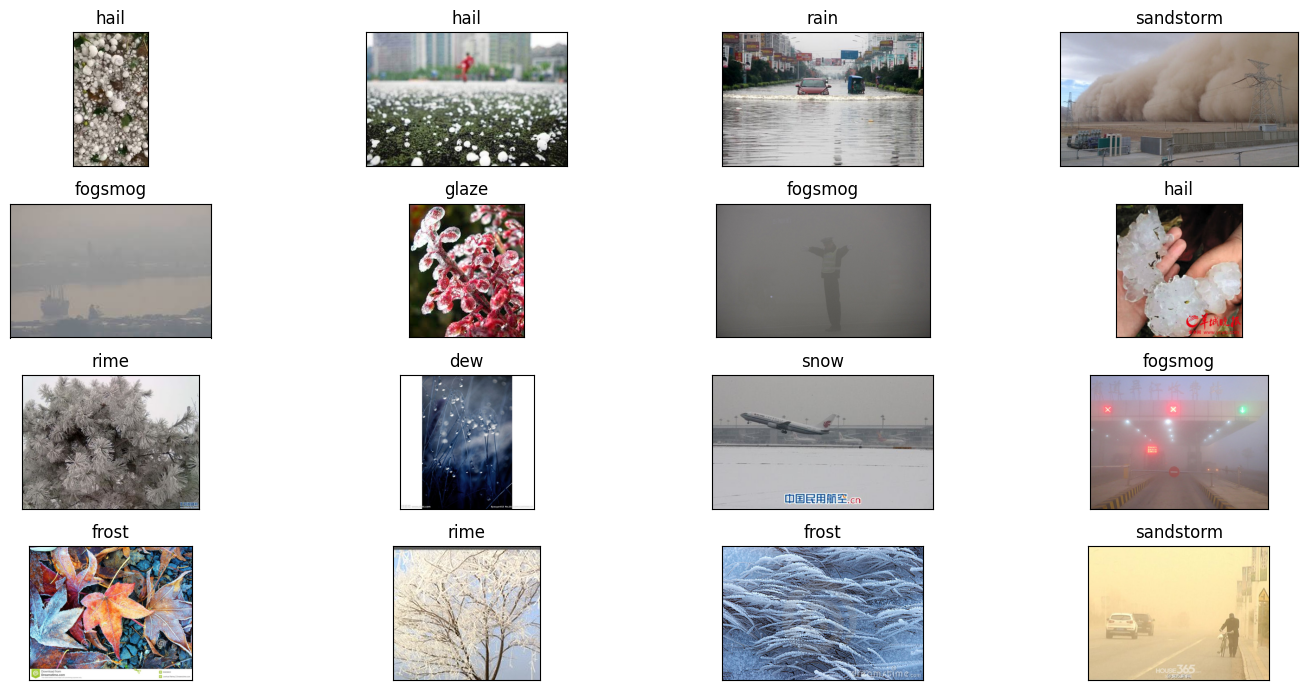

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.File_Path[i]))
    ax.set_title(data.Labels[i])
plt.tight_layout()
plt.show()

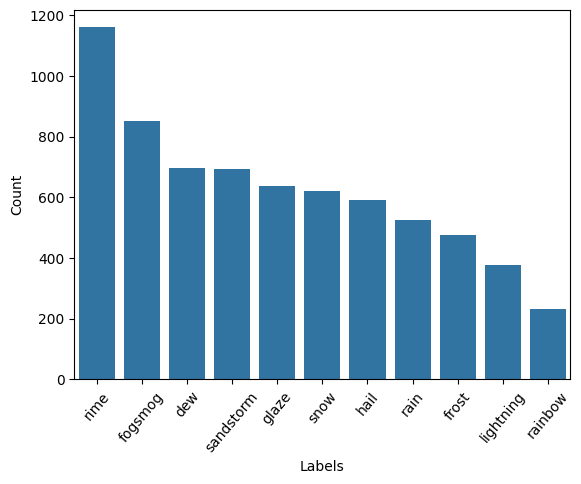

In [ ]:
counts = data.Labels.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=50);

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(data['File_Path'], data['Labels'], test_size=0.2, random_state=42)
train_df, test_df = train_test_split(data, test_size=0.2, random_state=2)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.2,
    height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255., rotation_range=30, width_shift_range=0.2,
    height_shift_range=0.2, horizontal_flip=True)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='File_Path',
    y_col='Labels',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=16,
    shuffle=True,
    seed=0,
    subset='training',
    rotation_range=30,
    zoom_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

valid_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='File_Path',
    y_col='Labels',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=16,
    shuffle=False,
    seed=0,
    subset='validation',
    rotation_range=30,
    zoom_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='File_Path',
    y_col='Labels',
    target_size=(256,256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    verbose=0,
    shuffle=False)

Found 4392 validated image filenames belonging to 11 classes.
Found 1097 validated image filenames belonging to 11 classes.
Found 1373 validated image filenames belonging to 11 classes.


#data prep

In [1]:
!kaggle datasets download jehanbhathena/weather-dataset

Dataset URL: https://www.kaggle.com/datasets/jehanbhathena/weather-dataset
License(s): CC0-1.0
100% 587M/587M [00:27<00:00, 23.4MB/s]
100% 587M/587M [00:27<00:00, 22.0MB/s]


In [2]:
!unzip /content/weather-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/frost/3913.jpg  
  inflating: dataset/frost/3914.jpg  
  inflating: dataset/frost/3915.jpg  
  inflating: dataset/frost/3916.jpg  
  inflating: dataset/frost/3917.jpg  
  inflating: dataset/frost/3918.jpg  
  inflating: dataset/frost/3919.jpg  
  inflating: dataset/frost/3920.jpg  
  inflating: dataset/frost/3921.jpg  
  inflating: dataset/frost/3922.jpg  
  inflating: dataset/frost/3923.jpg  
  inflating: dataset/frost/3924.jpg  
  inflating: dataset/frost/3925.jpg  
  inflating: dataset/frost/3926.jpg  
  inflating: dataset/frost/3927.jpg  
  inflating: dataset/frost/3928.jpg  
  inflating: dataset/frost/3929.jpg  
  inflating: dataset/frost/3930.jpg  
  inflating: dataset/frost/3931.jpg  
  inflating: dataset/frost/3932.jpg  
  inflating: dataset/frost/3933.jpg  
  inflating: dataset/frost/3934.jpg  
  inflating: dataset/frost/3935.jpg  
  inflating: dataset/frost/3936.jpg  
  inflating: dataset/frost/3937.jpg  

In [3]:
!cd /content/dataset
!mkdir /content/dataset/train /content/dataset/test
!mkdir /content/dataset/train/dew /content/dataset/train/fogsmog /content/dataset/train/frost /content/dataset/train/glaze /content/dataset/train/hail /content/dataset/train/lightning /content/dataset/train/rain /content/dataset/train/rainbow /content/dataset/train/rime /content/dataset/train/sandstorm /content/dataset/train/snow
!mkdir /content/dataset/test/dew /content/dataset/test/fogsmog /content/dataset/test/frost /content/dataset/test/glaze /content/dataset/test/hail /content/dataset/test/lightning /content/dataset/test/rain /content/dataset/test/rainbow /content/dataset/test/rime /content/dataset/test/sandstorm /content/dataset/test/snow

In [4]:
import os


path = "/content/dataset/"
for dirpath, dirnames, filenames in os.walk(path):
    directory_level = dirpath.replace(path, "")
    directory_level = directory_level.count(os.sep)
    indent = " " * 4
    print("{}{}/".format(indent*directory_level, os.path.basename(dirpath)))

    for f in filenames:
        print("{}{}".format(indent*(directory_level+1), f))

Streaming output truncated to the last 5000 lines.
    6144.jpg
    6496.jpg
    6618.jpg
    6604.jpg
    6330.jpg
    6219.jpg
    6247.jpg
    6475.jpg
    6354.jpg
    6365.jpg
    6226.jpg
    6521.jpg
    6508.jpg
    6379.jpg
    6391.jpg
    6316.jpg
    6621.jpg
    6445.jpg
    6317.jpg
    6489.jpg
    6523.jpg
    6347.jpg
    6318.jpg
    6590.jpg
    6334.jpg
    6130.jpg
    6519.jpg
    6284.jpg
    6640.jpg
    6397.jpg
    6415.jpg
    6412.jpg
    6186.jpg
    6450.jpg
    6218.jpg
    6573.jpg
    6137.jpg
    6723.jpg
    6443.jpg
    6467.jpg
    6560.jpg
    6304.jpg
    6111.jpg
    6566.jpg
    6188.jpg
    6476.jpg
    6210.jpg
    6141.jpg
    6541.jpg
    6429.jpg
    6255.jpg
    6577.jpg
    6571.jpg
    6113.jpg
    6539.jpg
    6588.jpg
    6408.jpg
    6139.jpg
    6558.jpg
    6524.jpg
    6275.jpg
    6252.jpg
    6362.jpg
    6091.jpg
    6220.jpg
    6658.jpg
    6507.jpg
    6127.jpg
    6385.jpg
    6657.jpg
    6427.jpg
    6441.jpg
    6336.jpg


In [5]:
import random
import shutil


types = ['fogsmog', 'hail', 'dew', 'sandstorm', 'rime', 'frost', 'rainbow', 'glaze', 'rain', 'snow', 'lightning']

for t in types:
    origin = '/content/dataset/' + t + '/'
    for root, dirs, files in os.walk(origin):
        random.shuffle(files)
        train_list = files[:int((0.8)*len(files))]
        test_list = files[int((0.8)*len(files)):]
        for f in train_list:
            shutil.copy(origin+f, '/content/dataset/train/' + t + '/' +f)
        for f in test_list:
            shutil.copy(origin+f, '/content/dataset/test/' + t + '/' +f)

In [6]:
print("TRAIN DATASET")
print("_____________")
sum = 0
for root, dirs, files in os.walk('/content/dataset/train'):
    if files != []:
        print(root, "-->", len(files))
        sum += len(files)

print("_____________")
print("TOTAL = ", sum)
print()
print()


print("TEST DATASET")
print("_____________")
sum = 0
for root, dirs, files in os.walk('/content/dataset/test'):
    if files != []:
        print(root, "-->", len(files))
        sum += len(files)

print("_____________")
print("TOTAL = ", sum)
print()

TRAIN DATASET
_____________
/content/dataset/train/sandstorm --> 553
/content/dataset/train/lightning --> 301
/content/dataset/train/rain --> 420
/content/dataset/train/glaze --> 511
/content/dataset/train/frost --> 380
/content/dataset/train/rime --> 928
/content/dataset/train/snow --> 496
/content/dataset/train/rainbow --> 185
/content/dataset/train/dew --> 558
/content/dataset/train/fogsmog --> 680
/content/dataset/train/hail --> 472
_____________
TOTAL =  5484


TEST DATASET
_____________
/content/dataset/test/sandstorm --> 139
/content/dataset/test/lightning --> 76
/content/dataset/test/rain --> 106
/content/dataset/test/glaze --> 128
/content/dataset/test/frost --> 95
/content/dataset/test/rime --> 232
/content/dataset/test/snow --> 125
/content/dataset/test/rainbow --> 47
/content/dataset/test/dew --> 140
/content/dataset/test/fogsmog --> 171
/content/dataset/test/hail --> 119
_____________
TOTAL =  1378



In [7]:
import tensorflow as tf

train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

batch_size = 32
image_size = (256, 256)


train_data_loader = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    label_mode='categorical',  # Using categorical labels for multi-class classification
    validation_split=0.1,  # 10% split of the training data for validation
    subset='training',  # Specifying 'training' to get the training split
)

validation_data_loader = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    label_mode='categorical',
    validation_split=0.1,
    subset='validation'  # Specifying 'validation' to get the validation split
)

test_data_loader = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    label_mode='categorical'
)

Found 5484 files belonging to 11 classes.
Using 4936 files for training.
Found 5484 files belonging to 11 classes.
Using 548 files for validation.
Found 1378 files belonging to 11 classes.


In [8]:
class_names = train_data_loader.class_names
print(class_names)

['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


In [9]:
for image_batch, labels_batch in train_data_loader:
    print("Image Batch Shape ", image_batch.shape)
    print("Labels Batch Shape ",labels_batch.shape)
    print()
    print("Labels Array of a particular image sample:")
    print(labels_batch[0])
    break

Image Batch Shape  (32, 256, 256, 3)
Labels Batch Shape  (32, 11)

Labels Array of a particular image sample:
tf.Tensor([0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(11,), dtype=float32)


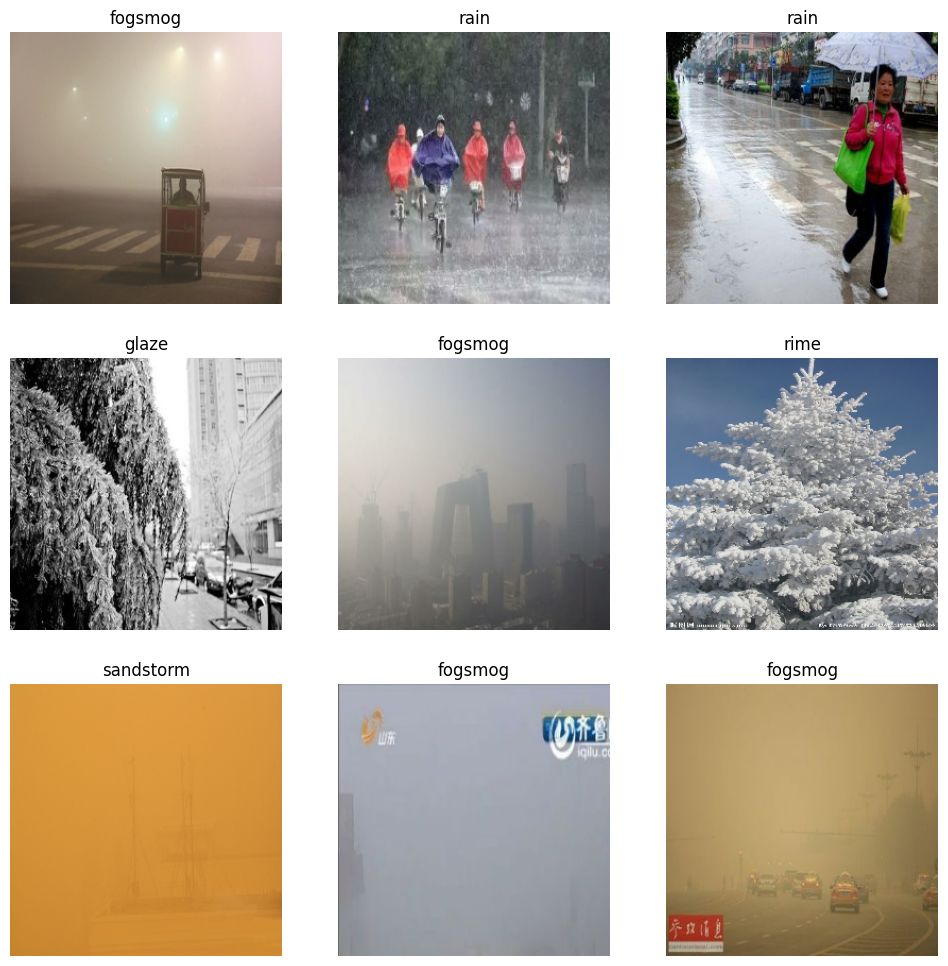

In [10]:
import matplotlib.pyplot as plt

train_ds = train_data_loader.take(1)

fig, axs = plt.subplots(3, 3, figsize=(12, 12))


for images, labels in train_ds:
    for i in range(9):
        row = i // 3  # Calculate the row index
        col = i % 3
        ax = axs[row, col]
        ax.imshow(images[i].numpy().astype("uint8"))


        # Convert the float tensor to an integer tensor
        int_tensor = tf.cast(labels[i], dtype=tf.int32)

        # Convert the integer tensor to a NumPy array
        int_array = int_tensor.numpy()

        for idx in range(0, len(int_array)):
            if int_array[idx] == 1:
                break
        ax.set_title(class_names[idx])
        ax.axis('off')

In [11]:
total_images = 0
for image_batch, _ in train_data_loader:
    total_images += len(image_batch)
print("Total number of images:", total_images)

Total number of images: 4936


In [12]:
def horizontal_flip(image, label):
    image = tf.image.flip_left_right(image)  # Flip horizontally
    return image, label


augment_train1 = train_data_loader
augment_train1 = augment_train1.map(horizontal_flip)

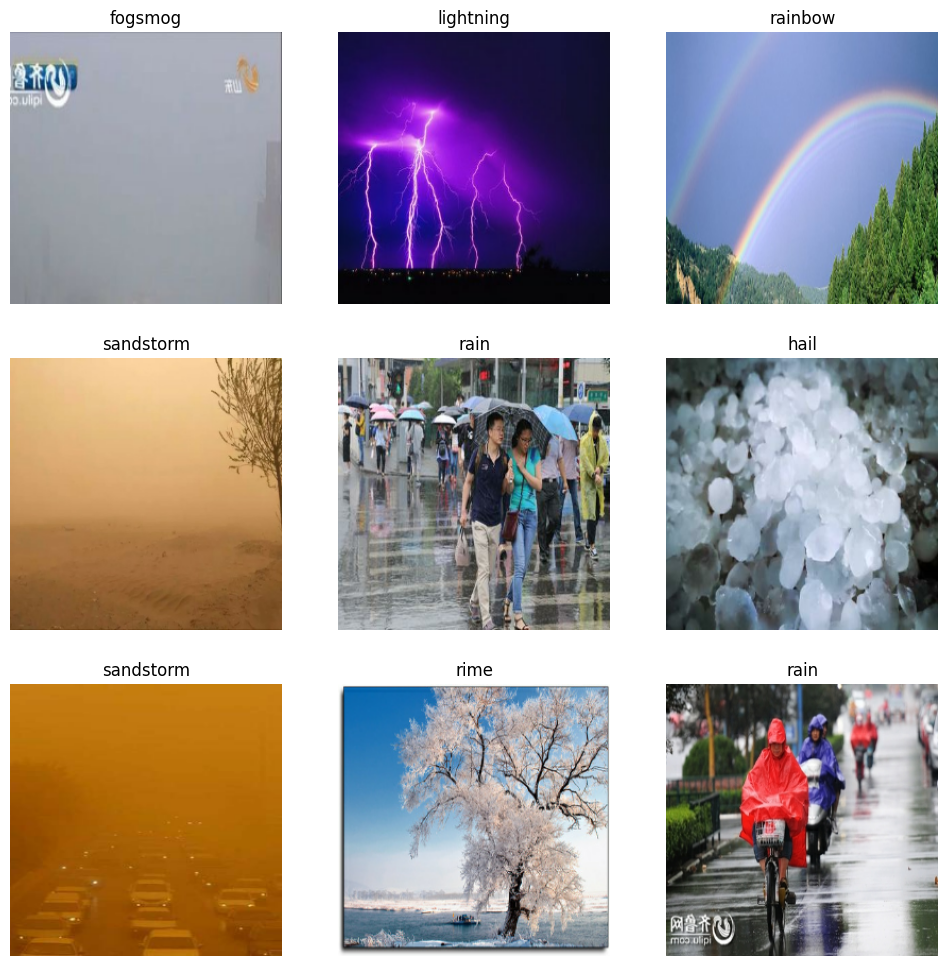

In [13]:
import matplotlib.pyplot as plt

dataloader = augment_train1.take(1)

fig, axs = plt.subplots(3, 3, figsize=(12, 12))


for images, labels in dataloader:
    for i in range(9):
        row = i // 3  # Calculate the row index
        col = i % 3
        ax = axs[row, col]
        ax.imshow(images[i].numpy().astype("uint8"))


        # Convert the float tensor to an integer tensor
        int_tensor = tf.cast(labels[i], dtype=tf.int32)

        # Convert the integer tensor to a NumPy array
        int_array = int_tensor.numpy()

        for idx in range(0, len(int_array)):
            if int_array[idx] == 1:
                break
        ax.set_title(class_names[idx])
        ax.axis('off')

In [14]:
train_data_loader = train_data_loader.concatenate(augment_train1)

In [15]:
total_images = 0
for image_batch, _ in train_data_loader:
    total_images += len(image_batch)
print("Total number of images:", total_images)

Total number of images: 9872


In [16]:
import tensorflow as tf
normalization_layer = tf.keras.layers.Rescaling(1./255)


# Applying the rescale transformation using the map method
train_data_loader = train_data_loader.map(lambda x, y: (normalization_layer(x), y))
validation_data_loader = validation_data_loader.map(lambda x, y: (normalization_layer(x), y))
test_data_loader = test_data_loader.map(lambda x, y: (normalization_layer(x), y))

#model

In [19]:
from keras.optimizers import Adam

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to transition from convolutional layers to fully connected layers
model.add(Flatten())

# Dropout regularization
model.add(Dropout(0.5))

# Fully connected layers
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(11, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation accuracy
    patience=5,           # Number of epochs with no improvement after which training will stop
    verbose=1,            # Display messages about the early stopping process
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

In [21]:
model.fit(train_data_loader,
    validation_data=validation_data_loader,
    epochs=20,
    callbacks=[early_stopping])

Epoch 1/20
310/310 [==============================] - 47s 130ms/step - loss: 2.1138 - accuracy: 0.5582 - val_loss: 1.5549 - val_accuracy: 0.6204
Epoch 2/20
310/310 [==============================] - 42s 133ms/step - loss: 1.3831 - accuracy: 0.6715 - val_loss: 1.3199 - val_accuracy: 0.6788
Epoch 3/20
310/310 [==============================] - 41s 130ms/step - loss: 1.2360 - accuracy: 0.7010 - val_loss: 1.2645 - val_accuracy: 0.7007
Epoch 4/20
310/310 [==============================] - 39s 125ms/step - loss: 1.1627 - accuracy: 0.7241 - val_loss: 1.2899 - val_accuracy: 0.6569
Epoch 5/20
310/310 [==============================] - 40s 128ms/step - loss: 1.1224 - accuracy: 0.7276 - val_loss: 1.2967 - val_accuracy: 0.6679
Epoch 6/20
310/310 [==============================] - 41s 131ms/step - loss: 1.0847 - accuracy: 0.7436 - val_loss: 1.2169 - val_accuracy: 0.6934
Epoch 7/20
310/310 [==============================] - 40s 127ms/step - loss: 1.0836 - accuracy: 0.7477 - val_loss: 1.1743 - val_ac

In [22]:
test_loss, test_accuracy = model.evaluate(test_data_loader, verbose=2)

print("Test Accuracy: ", test_accuracy)
print("Test Loss: ", test_loss)

44/44 - 4s - loss: 1.1579 - accuracy: 0.7119 - 4s/epoch - 85ms/step
Test Accuracy:  0.7119013071060181
Test Loss:  1.1579160690307617


In [23]:
model.save("weather_model_scratch_updated.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
